### 1. Загрузка и исследование данных:

In [1]:
# Библиотеки
import pandas as pd
from IPython.display import display 
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import scipy.stats as stats
import warnings as warning
warning.filterwarnings('ignore')




In [2]:
# Открываем файлы
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [3]:
# Основная информация о таблице
hypothesis.info()
display(hypothesis)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
Hypothesis    9 non-null object
Reach         9 non-null int64
Impact        9 non-null int64
Confidence    9 non-null int64
Efforts       9 non-null int64
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3
6,Показать на главной странице баннеры с актуаль...,5,3,8,3
7,Добавить форму подписки на все основные страни...,10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5


In [4]:
# Переименуем столбцы
hypothesis.columns = ['hypothesis', 'reach', 'impact', 'confidence', 'efforts']

In [5]:
# Основная информация о таблице
orders.info()
display(orders.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null int64
group            1197 non-null object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
# Переименуем столбцы
orders.columns = ['transaction_id', 'visitor_id', 'date', 'revenue', 'group']

In [7]:
# Проверка на дубликаты
orders.duplicated().sum()

0

In [8]:
# Основная информация о таблице
visitors.info()
display(visitors.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date        62 non-null object
group       62 non-null object
visitors    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,date,group,visitors
24,2019-08-25,A,621
55,2019-08-25,B,679
10,2019-08-11,A,718
23,2019-08-24,A,395
32,2019-08-02,B,581
49,2019-08-19,B,487
4,2019-08-05,A,756
53,2019-08-23,B,546
18,2019-08-19,A,502
40,2019-08-10,B,369


In [9]:
# Проверка на дубликаты
visitors.duplicated().sum()

0

##### Выводы

Даны для работы три файла. Пропусков в данных нет, для удобства были переименованны столбцы. Столбцы с датами имеют тип данных 'object'.

### 2. Приоритизация гипотез

#### 2.1 Применим фреймворк ICE для приоритизации гипотез
Отсортируйте их по убыванию приоритета.

In [10]:
hypothesis['ice'] = (hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).round().astype('int')
pd.set_option('display.max_colwidth', 500)
display(hypothesis[['hypothesis','ice']].sort_values(by = 'ice', ascending = False))


,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1


##### Выводы

По фремворку ICE лидируют гипотезы 8, 0 , 7

#### 2.2 Применим фреймворк RICE для приоритизации гипотез
Отсортируйте их по убыванию приоритета.

In [11]:
hypothesis['rice'] = (hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']).astype('int')
pd.set_option('display.max_colwidth', 500)
display(hypothesis[['hypothesis','rice']].sort_values(by = 'rice', ascending = False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40
8,"Запустить акцию, дающую скидку на товар в день рождения",16
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3


##### Выводы

По фремворку RICE лидируют гипотезы 7, 2 , 0 и 6

#### 2.3 Как изменилась приоритизация гипотез при применении RICE вместо ICE? Объясните, почему так произошло.

##### Выводы

Приоритизация при применении RICE вместо ICE изменилась очередностью гипотез. Если в показателях ICE приоритизация рассчитывается теоретически, то  данные RICE показывают более реальную ситуацию с учетом количества клиентов, чьих интересов это коснется.

### 3. Анализ A/B-теста

#### 3.1 График кумулятивной выручки по группам

In [12]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
display(orders.head())

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
dates_groups = orders[['date','group']].drop_duplicates() 

In [14]:
#кумулятивные данные о заказах по дням  
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(
        orders['date'] <= x['date'], 
        orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 
      'transaction_id' : pd.Series.nunique, 
      'visitor_id' : pd.Series.nunique, 
      'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 
display(orders_aggregated.head())

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401
173,2019-08-02,B,45,43,266748
291,2019-08-03,A,68,62,354874


In [15]:
#кумулятивные данные о визитах по дням  
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], 
        visitors['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 
      'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 
display(visitors_aggregated.head())

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [16]:
#общая кумулятивная таблица данных
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on = ['date','group'], right_on = ['date','group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
display(cumulative_data.head())

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


In [17]:
# Кумулятивная выручка по группам
cumulative_revenueA = cumulative_data[cumulative_data['group'] == 'A'][['orders', 'date', 'revenue']]
display(cumulative_revenueA.head())

,orders,date,revenue
0,24,2019-08-01,148579
2,44,2019-08-02,242401
4,68,2019-08-03,354874
6,84,2019-08-04,425699
8,109,2019-08-05,549917


In [18]:
cumulative_revenueB = cumulative_data[cumulative_data['group'] == 'B'][['orders', 'date', 'revenue']]
display(cumulative_revenueB.head())

,orders,date,revenue
1,21,2019-08-01,101217
3,45,2019-08-02,266748
5,61,2019-08-03,380996
7,78,2019-08-04,489567
9,101,2019-08-05,581995


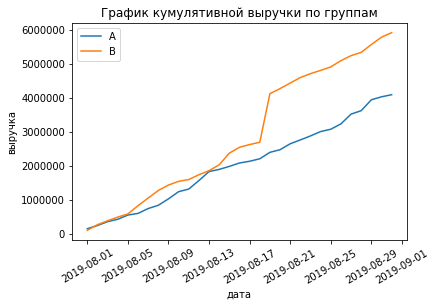

In [19]:
# График
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation = 30)
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'], label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'], label='B')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('дата')
plt.ylabel('выручка')
plt.legend() 
plt.show()

##### Выводы

Равномерное увеличение выручки в течение всего теста. 
Графики выручки группы B в одной точке резко растет. Возможно увеличилось количество заказов или появились очень дорогие заказы.

#### 3.2 График кумулятивного среднего чека по группам

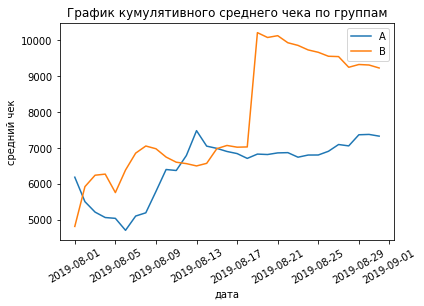

In [20]:
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation = 30)
plt.plot(cumulative_revenueA['date'], cumulative_revenueA['revenue'] / cumulative_revenueA['orders'] , label='A')
plt.plot(cumulative_revenueB['date'], cumulative_revenueB['revenue'] / cumulative_revenueB['orders'] , label='B')
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('дата')
plt.ylabel('средний чек')
plt.legend() 
plt.show()

##### Выводы

Относительно равномерным средний чек становится ближе к концу теста: у группы A тенденция к повышению, у группы B падает. 
При детальном рассмотрении графика группы B видны достаточно резкие скачки, возможно появлялись непостоянные крупные заказы и за счет них появлялся всплеск. Ситуация графика группы А тоже имеет всплески, но не столь резкие.

#### 3.3 График относительного изменения кумулятивного среднего чека группы B к группе A

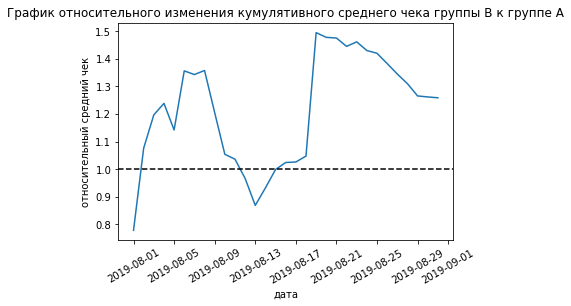

In [21]:
total_cumulative_revenue = pd.merge(cumulative_revenueA, cumulative_revenueB, on = 'date', suffixes=['A', 'B'])

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation = 30)
plt.plot(total_cumulative_revenue['date'], 
         (total_cumulative_revenue['revenueB'] / total_cumulative_revenue['ordersB']
         )/(total_cumulative_revenue['revenueA'] / total_cumulative_revenue['ordersA']))
plt.axhline(y=1, color='black', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('дата')
plt.ylabel('относительный средний чек')
plt.show()

##### Выводы

График имеет резкие скочки и падения, скорее всего влияние оказывают аномальные значения

#### 3.4 График кумулятивной конверсии по группам

In [22]:
cumulative_data['convertion'] = cumulative_data['orders'] / cumulative_data['visitors']
cumulative_convertionA = cumulative_data[cumulative_data['group'] == 'A']
cumulative_convertionB = cumulative_data[cumulative_data['group'] == 'B']


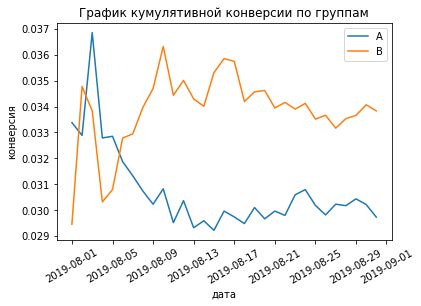

In [23]:
fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation = 30)
plt.plot(cumulative_convertionA['date'], cumulative_convertionA['convertion'], label='A')
plt.plot(cumulative_convertionB['date'], cumulative_convertionB['convertion'], label='B')
plt.legend() 
plt.title('График кумулятивной конверсии по группам')
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.show()

##### Выводы

Практически симметричный график получился. Скачки в группах происходят примерно в одно и тоже время.

#### 3.5 График относительного изменения кумулятивной конверсии группы B к группе A

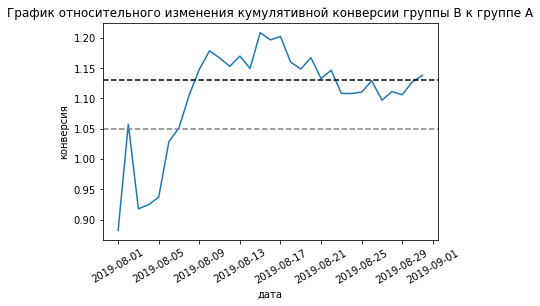

In [24]:
total_cumulative_convertion = pd.merge(cumulative_convertionA, cumulative_convertionB, on = 'date', suffixes=['A', 'B'])

fig, ax = plt.subplots()
ax.xaxis.set_tick_params(rotation = 30)

plt.plot(total_cumulative_convertion['date'],
         total_cumulative_convertion['convertionB']/total_cumulative_convertion['convertionA'])
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A')
plt.axhline(y=1.13, color='black', linestyle='--')
plt.axhline(y=1.05, color='grey', linestyle='--')
plt.xlabel('дата')
plt.ylabel('конверсия')
plt.show()

##### Выводы

График относительного изменения кумулятивной конверсии говорит о том, что результаты группы B лучше группы A: хоть и скачут, но имеют тенденцию к росту в отличии от угасающего графика группы А, показатели не стабилизоравались.

#### 3.6 Точечный график количества заказов по пользователям

In [25]:
orders_users = (
    orders.drop(['group', 'revenue', 'date'], axis=1)
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_users.columns = ['visitor_id', 'orders']

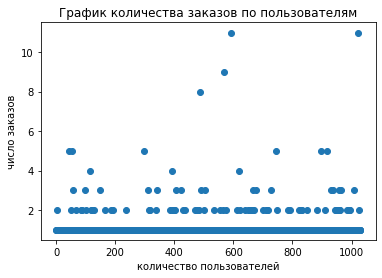

In [26]:
x_values = pd.Series(range(0,len(orders_users)))

plt.scatter(x_values, orders_users['orders'])

plt.title('График количества заказов по пользователям')
plt.xlabel('количество пользователей')
plt.ylabel('число заказов')
plt.show()

##### Выводы

Большинство пользователей пользователей с 1-2 заказами.

#### 3.7 Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

In [27]:
print('95-й и 99-й перцентили количества заказов на пользователя')
print(np.percentile(orders_users['orders'], [95,99])) 

95-й и 99-й перцентили количества заказов на пользователя
[2. 4.]


##### Выводы

Не более 5% пользователей оформляли больше чем 2 заказа. И 1% пользователей заказывали более 4 раз. Для дальнейшей работы целесообразно отсечь аномальные данные по количеству заказов больше 2.

#### 3.8 Точечный график стоимостей заказов.

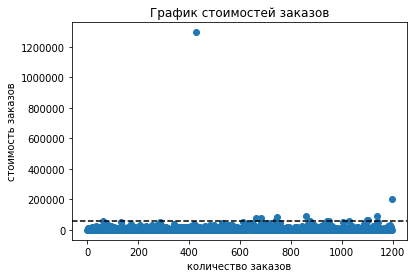

In [28]:
x_values = pd.Series(range(0,len(orders)))
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('количество заказов')
plt.ylabel('стоимость заказов')
plt.axhline(y=60000, color='black', linestyle='--')
plt.show()

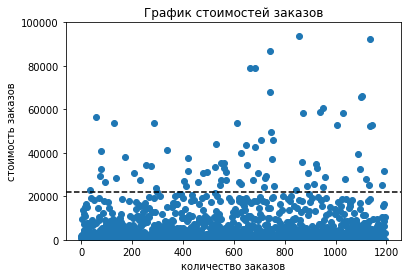

In [29]:
# добавим ограничения по стоимости и детальнее рассмотрим график
x_values = pd.Series(range(0,len(orders)))
plt.ylim([0, 100000])
plt.scatter(x_values, orders['revenue'])
plt.title('График стоимостей заказов')
plt.xlabel('количество заказов')
plt.ylabel('стоимость заказов')
plt.axhline(y=22000, color='black', linestyle='--')
plt.show()

##### Выводы

Большинство заказов стоимостью до 60000. На графике визуально определяются выбросы стоимостью более  200000 и 1000000.

#### 3.9 Посчитаем 95-й и 99-й перцентили стоимости заказов. 

In [30]:
print('95-й и 99-й перцентили стоимости заказов')
print(np.percentile(orders['revenue'], [95,99])) 

95-й и 99-й перцентили стоимости заказов
[28000.  58233.2]


##### Выводы

Не более 5% пользователей оформляли заказ стоимостью 28000. И около 1% пользователей делали заказы стоимотью около 58000. Для дальнейшей работы целесообразно отсечь аномальные данные по заказам выше 28000р.

#### 3.10 Статистическая значимость различий в конверсии между группами по «сырым» данным

- H0: Статистическая значимость равенства конверсии между группами
- H1: Статистическая значимость различий в конверсии между группами

In [31]:
# Критический уровень статистической значимости
alpha = 0.05  

# Число заказов каждого пользователя
orders_users_A = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_users_A.columns = ['visitor_id', 'orders']


orders_users_B = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_users_B.columns = ['visitor_id', 'orders']


print(orders_users_A.head(), orders_users_B.head())

#display(orders_users_B.head())


   visitor_id  orders
0     8300375       1
1    11685486       1
2    54447517       1
3    66685450       1
4    78758296       1    visitor_id  orders
0     5114589       1
1     6958315       1
2     8300375       1
3    39475350       1
4    47206413       1


In [32]:
# Количество посетителей по группам
visitors_A = visitors[visitors['group'] =='A']
visitors_B = visitors[visitors['group'] =='B']

display(visitors_A.head())
display(visitors_B.head())

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,date,group,visitors
31,2019-08-01,B,713
32,2019-08-02,B,581
33,2019-08-03,B,509
34,2019-08-04,B,770
35,2019-08-05,B,707


In [33]:
# Количество заказов по группам
sample_A = pd.concat([orders_users_A['orders'], 
                      pd.Series(0, index=np.arange(
                          visitors_A['visitors'].sum() - len(orders_users_A['orders'])
                      ), name='orders')],axis=0)


sample_B = pd.concat([orders_users_B['orders'], 
                      pd.Series(0, index=np.arange(
                          visitors_B['visitors'].sum() - len(orders_users_B['orders'])
                      ), name='orders')],axis=0)


In [34]:
# Проверка критерием Манна-Уитни
print("p-value {0:.3f}".format(stats.mannwhitneyu(sample_A, sample_B, alternative='two-sided')[1]))

print("Относительный прирост конверсии группы B {0:.3f}".format(sample_B.mean() / sample_A.mean() - 1))


p-value 0.017
Относительный прирост конверсии группы B 0.138


##### Выводы

p-value = 0.017 меньше 0.05(критический уровень статистической значимости). Значит, нулевая гипотеза  отвергается, конверсии различны. Относительный выйгрыш по конверсии группы B равен 13.8%. Тест рекомендуется повторить после исключения аномальных данных из выборки.

#### 3.11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

- H0: Статистическая значимость равенства среднего чека между группами
- H1: Статистическая значимость различий среднего чека между группами

In [35]:
#Проверим гипотезу о статист- H0: Статистическая значимость различий в конверсии между группами

print('p-value {0:.3f}'.format(stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], 
    orders[orders['group']=='B']['revenue'], alternative='two-sided')[1]))
print('Относительный прирост среднего чека группы B {0:.3f}'.format(orders[
    orders['group']=='B']['revenue'].mean()/orders[
    orders['group']=='A']['revenue'].mean()-1))

p-value 0.729
Относительный прирост среднего чека группы B 0.259


##### Выводы

p-value = 0.729 больше 0.05(критический уровень статистической значимости). Значит, нулевая гипотеза подтверждается, средний чек одинаковый. Относительный выйгрыш по среднему чеку группы B равен 25.9%. Тест рекомендуется повторить после исключения аномальных данных из выборки.

#### 3.12 Статистическая значимость различий в конверсии между группами по «очищенным» данным

- H0: Статистическая значимость равенства конверсии между группами
- H1: Статистическая значимость различий в конверсии между группами

In [36]:
orders_anomaly = pd.concat(
    [
        orders_users_A[orders_users_A['orders'] > 2]['visitor_id'],
        orders_users_B[orders_users_B['orders'] > 2]['visitor_id'],
    ],
    axis=0,
)
revenue_anomaly = orders[orders['revenue'] > 28000]['visitor_id']
users_anomaly  = (
    pd.concat([orders_anomaly, revenue_anomaly], axis=0)
    .drop_duplicates()
    .sort_values()
)
#print(users_anomaly.head(5))
#print(users_anomaly.shape) 

In [37]:
# 'Очищенное' количество заказов по группам
clear_sample_A = pd.concat(
    [
        orders_users_A[
            np.logical_not(orders_users_A['visitor_id'].isin(users_anomaly))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_A['visitors'].sum() - len(orders_users_A['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

clear_sample_B = pd.concat(
    [
        orders_users_B[
            np.logical_not(orders_users_B['visitor_id'].isin(users_anomaly))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitors_B['visitors'].sum() - len(orders_users_B['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

In [38]:
# Проверка критерием Манна-Уитни
print("p-value {0:.3f}".format(stats.mannwhitneyu(clear_sample_A, clear_sample_B, alternative='two-sided')[1]))

print("Относительный прирост конверсии группы B {0:.3f}".format(clear_sample_B.mean() / clear_sample_A.mean() - 1))


p-value 0.013
Относительный прирост конверсии группы B 0.173


##### Выводы

p-value = 0.013 меньше 0.05(критический уровень статистической значимости). Значит, нулевая гипотеза  не подтверждается, конверсии разные. После "очистки" данных относительный выйгрыш по конверсии группы B стал  17,3%. 

#### 3.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

- H0: Статистическая значимость равенства среднего чека между группами
- H1: Статистическая значимость различий среднего чека между группами

In [39]:
#Проверим гипотезу о статистической значимости различий в среднем чеке по 'очищенным' данным
print(
    'p-value {0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(users_anomaly)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(users_anomaly)),
                )
            ]['revenue'], alternative='two-sided'
        )[1]
    )
)

print(
    "Относительный прирост среднего чека группы B {0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(users_anomaly)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(users_anomaly)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

p-value 0.738
Относительный прирост среднего чека группы B -0.020


##### Выводы

p-value = 0.738 больше 0.05(критический уровень статистической значимости). Значит, нулевая гипотеза подтверждается, средний чек одинаковый. После "очистки" данных относительный выйгрыш по среднему чеку группы B сменился на пройгрыш в 2%. 

#### 3.14 Принятие решения по результатам теста и объясните его. Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

##### Выводы

Принято решение остановить тест

### 4. Выводы и рекомендации

В результате тестирования выяснилось следующее:
- Статистически значимое различие по конверсии между группами есть по «сырым» и «очищенным» данным;
- Прирост по конверссии по «сырым» данным 13.8%, а по данным после фильтрации около 17,3%
- Нет статистически значимого различия по среднему чеку между группами ни по «сырым», ни по данным после фильтрации аномалий;
- Прирост по среднему чеку по «сырым» данным 25.9%, а по данным после фильтрации аномалий проигрыш составляет около 2%
- График различия конверсии между группами сообщает, что результаты группы B лучше группы A, однако показатели не стабилизоравались.
- График различия среднего чека говорит о том, что результаты группы B  значительно лучше группы А, однако в данных присутствуют большие выбросы и опираться на данное исследование было бы ошибочно.

Исходя из обнаруженных фактов, тест следует остановить и признать группу B лучше. Даже с учетом отсутствия положительных различий между группами, увеличение выручки будет достигаться за счет увеленчения конверсии. Гипотезы для увеличения выручки следует воплощать по приоретизации фремворка RICE.